In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [7]:
df.head()



,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [11]:
df.drop(105,axis=0,inplace=True)

In [12]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [13]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [14]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [15]:
df.set_index('Month',inplace=True)

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<Axes: xlabel='Month'>

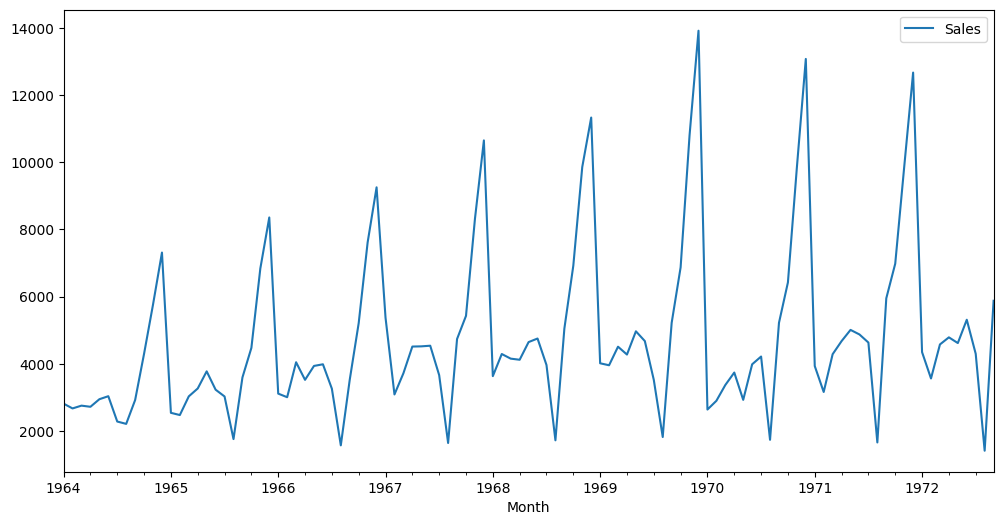

In [17]:
df.plot(figsize=(12,6))

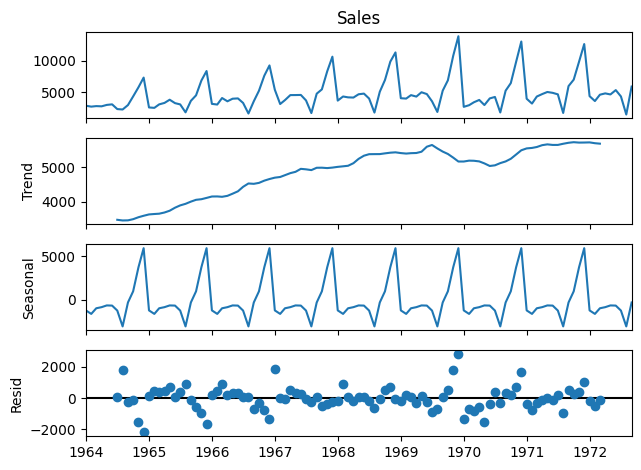

In [20]:
# Breaking the original series into components like trend , seasonality and recedue and then #plotting these components.
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Sales'])
results.plot();

In [21]:
#Finding the length of datasest i’e finding number of sales data entries within dataset and #then splitting dataset into train set and test set
len(df)

105

In [22]:
train = df.iloc[:93]
test = df.iloc[93:] 

In [27]:
# Using MinMaxScaler to convert sales data within range of (0-1) because we don’t want t# 
#The model to get Confused because of huge range of magnitude
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.head(),df.tail()

(             Sales
 Month             
 1964-01-01  2815.0
 1964-02-01  2672.0
 1964-03-01  2755.0
 1964-04-01  2721.0
 1964-05-01  2946.0,
              Sales
 Month             
 1972-05-01  4618.0
 1972-06-01  5312.0
 1972-07-01  4298.0
 1972-08-01  1413.0
 1972-09-01  5877.0)

In [28]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
#Printing first 10 entries of scaled train.
scaled_train[:10]

array([[0.10062384],
       [0.08903832],
       [0.09576278],
       [0.09300818],
       [0.11123714],
       [0.11852872],
       [0.05744146],
       [0.05177023],
       [0.10929272],
       [0.22101596]])

In [29]:
from keras.preprocessing.sequence import TimeseriesGenerator
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
#The flatten() function is used to get a copy of a given array collapsed into one direction

Given the Array: 
[0.10062384 0.08903832 0.09576278]
Predict this y: 
 [[0.09300818]]


In [30]:
# We do the same thing, but now for 12 months instead of 3.
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
#X,y = generator[0]
#print(f'Given the Array: \n{X.flatten()}')
#print(f'Predict this y: \n {y}')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True , input_shape=(n_input, n_features)))
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121301 (473.83 KB)
Trainable params: 121301 (473.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
81/81 [==============================] - 3s 7ms/step - loss: 0.0511
Epoch 2/50
81/81 [==============================] - 1s 7ms/step - loss: 0.0461
Epoch 3/50
81/81 [==============================] - 1s 7ms/step - loss: 0.0427
Epoch 4/50
81/81 [==============================] - 1s 7ms/step - loss: 0.0352
Epoch 5/50
81/81 [==============================] - 1s 8ms/step - loss: 0.0294
Epoch 6/50
81/81 [==============================] - 1s 7ms/step - loss: 0.0224
Epoch 7/50
81/81 [==============================] - 1s 7ms/step - loss: 0.0407
Epoch 8/50
81/81 [==============================] - 1s 7ms/step - loss: 0.0416
Epoch 9/50
81/81 [==============================] - 1s 8ms/step - loss: 0.1013
Epoch 10/50
81/81 [==============================] - 1s 8ms/step - loss: 0.0538
Epoch 11/50
81/81 [==============================] - 1s 8ms/step - loss: 0.0462
Epoch 12/50
81/81 [==============================] - 1s 8ms/step - loss: 0.0437
Epoch 13/50
81/81 [==============================

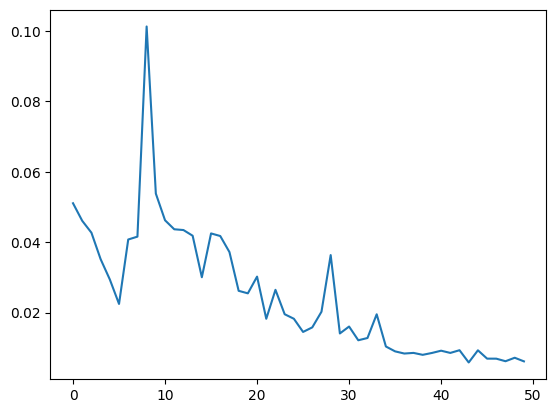

In [32]:
# Validation loss after every epoch gets stored in the model . Hence from model history we #are getting loss after every epoch and plotting that , which is showing downward slope
#whch shows that loss after every epoch is decreasing initially and high rate and then at
#slower rate.
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [33]:
# Getting the last training batch and predicting the first value.
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1,12,1))
model.predict(last_train_batch)

1/1 [==============================] - 0s 315ms/step


array([[0.4987725]], dtype=float32)

In [37]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in range(len(test)):
# get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
# append the prediction into the array
    test_predictions.append(current_pred)
# use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [38]:
test_predictions

[array([0.4987725], dtype=float32),
 array([0.8798193], dtype=float32),
 array([1.0152123], dtype=float32),
 array([0.21199027], dtype=float32),
 array([0.16440241], dtype=float32),
 array([0.23456559], dtype=float32),
 array([0.2618313], dtype=float32),
 array([0.28261018], dtype=float32),
 array([0.2678954], dtype=float32),
 array([0.24366799], dtype=float32),
 array([0.12410411], dtype=float32),
 array([0.39862365], dtype=float32)]

In [39]:
# Converting scaled prediction values back to original values.
true_predictions = scaler.inverse_transform(test_predictions)

In [40]:
test['Predictions'] = true_predictions

C:\Users\khans\AppData\Local\Temp\ipykernel_10392\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [41]:
# printing actual and predicted values of sales of last 10 months for the purpose of testing.
test.head(12),test.tail()

(              Sales   Predictions
 Month                            
 1971-10-01   6981.0   7729.348992
 1971-11-01   9851.0  12432.609298
 1971-12-01  12670.0  14103.765387
 1972-01-01   4348.0   4189.595866
 1972-02-01   3564.0   3602.218951
 1972-03-01   4577.0   4468.243026
 1972-04-01   4788.0   4804.783901
 1972-05-01   4618.0   5061.257427
 1972-06-01   5312.0   4879.632929
 1972-07-01   4298.0   4580.594000
 1972-08-01   1413.0   3104.817059
 1972-09-01   5877.0   6493.211654,
              Sales  Predictions
 Month                          
 1972-05-01  4618.0  5061.257427
 1972-06-01  5312.0  4879.632929
 1972-07-01  4298.0  4580.594000
 1972-08-01  1413.0  3104.817059
 1972-09-01  5877.0  6493.211654)

<Axes: xlabel='Month'>

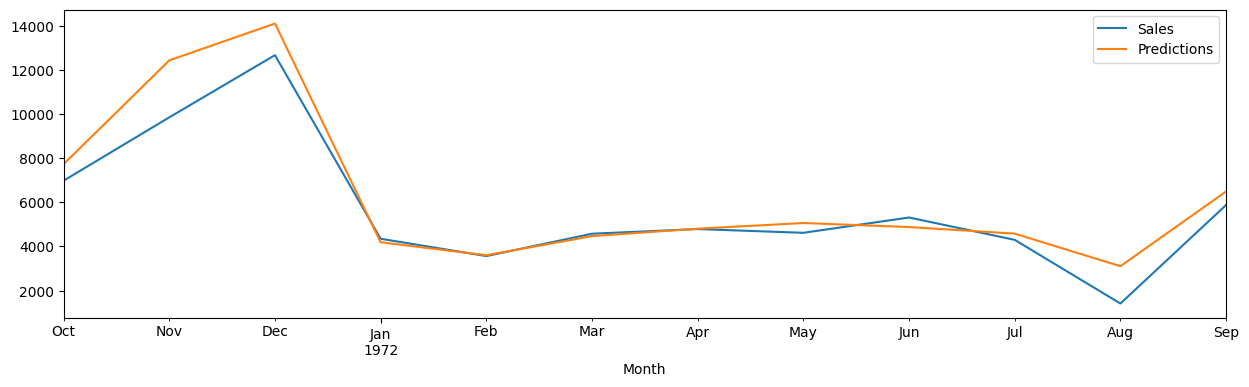

In [42]:
#Plotting actual and predicted values for comparative analysis.
test.plot(figsize=(15,4))

In [43]:
#Finding root mean squared error.
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Sales'],test['Predictions']))
print(rmse)

1041.80603876944


In [45]:
#Finding root mean absolute error.
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test['Sales'],test['Predictions'])
print(mae) 

712.677904083083
